<a href="https://colab.research.google.com/github/Nimalnix/Deep-Learning/blob/main/Digits_recognition_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Handwritten digits classification using neural network**
![digits_nn.jpg](data:image/jpeg;base64,Cg==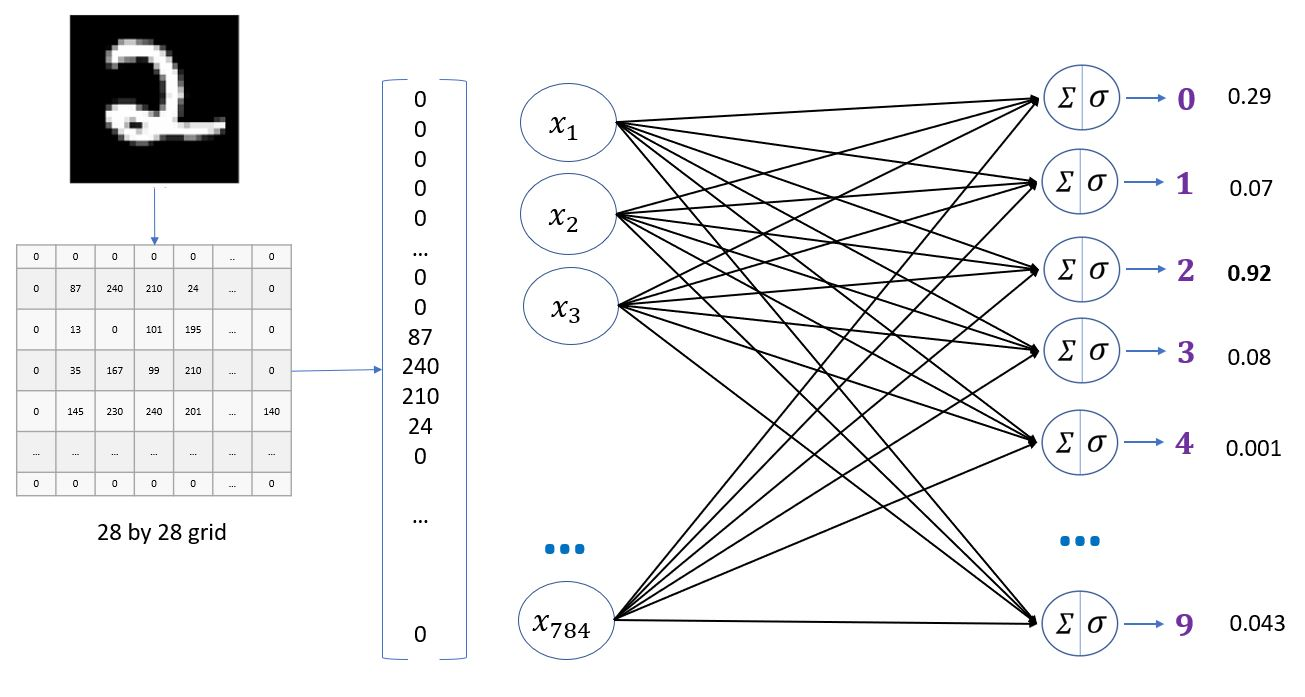)

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [2]:
pip install pandas numpy scikit-learn matplotlib

In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
len(X_train)

60000

In [8]:
len(X_test)

10000

In [9]:
X_train[0].shape

(28, 28)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Represented in a two dimensional array
0-Black
255-White

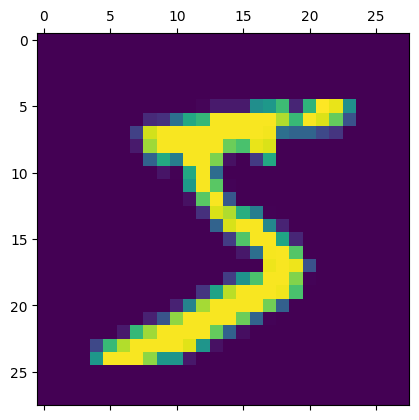

In [11]:
plt.matshow(X_train[0])

In [12]:
y_train[0]

5

In [13]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [26]:
X_train = X_train / 255
X_test = X_test / 255     #scaling

In [27]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Going to flatten our training dataset bcz in the presentation that we want to convert 28 by 28 image into single dimensional array that will have 748 elements

In [28]:
X_train.shape

(60000, 28, 28)

 Here it has 3 dimensions where 6000-number of samples Second and third dimensions is individual image

 In reshape we want to get 60000,784

In [29]:
X_train_flattened=X_train.reshape(len(X_train),28*28)

In [30]:
X_train_flattened.shape

(60000, 784)

In [31]:
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

Here the 2D is convereted into 1D

In [32]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Very simple neural network with no hidden layers
 https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/0981fe55db7a7abf19ff1d852d9a59153289641e/1_digits_recognition/digits_nn.jpg

 Input layer with 784 elements and output layer with 10 elements

In [33]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
]) #Input layer and are connect in dense NN

In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4768 - accuracy: 0.8747
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3041 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2670 - accuracy: 0.9248


Scaling is important step

In [35]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2645 - accuracy: 0.9273


[0.26453033089637756, 0.927299976348877]

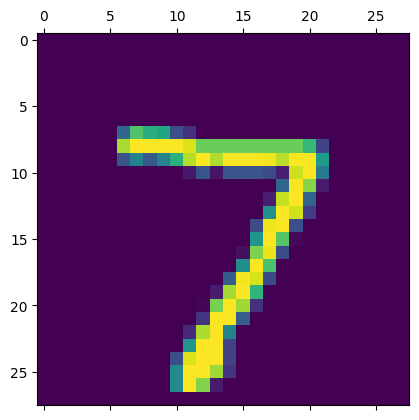

In [36]:
plt.matshow(X_test[0])

In [37]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([2.4837270e-02, 3.7491290e-07, 3.8642991e-02, 9.5698959e-01,
       1.6260033e-03, 9.5009364e-02, 1.3489034e-06, 9.9972618e-01,
       7.8134097e-02, 6.1846900e-01], dtype=float32)

np.argmax finds a maximum element from an array and returns the index of it

In [38]:
np.argmax(y_predicted[0])

7

Going to perform confusion matrix

Before that the y_predicted is whole number we want to convert into to y_test formet to perform cofusion matrix

In [39]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [40]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [41]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [42]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    4,    7,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   8,    9,  923,   15,    8,    5,   13,   10,   37,    4],
       [   4,    0,   21,  922,    0,   24,    2,   11,   19,    7],
       [   1,    1,    3,    2,  921,    0,   12,    4,    9,   29],
       [  11,    3,    2,   27,   10,  777,   19,    6,   31,    6],
       [  10,    3,    6,    1,    7,    9,  919,    2,    1,    0],
       [   1,    7,   21,    9,    8,    0,    0,  956,    2,   24],
       [   7,    9,    7,   22,    9,   23,   10,   13,  869,    5],
       [  11,    7,    1,   11,   33,    9,    0,   25,    6,  906]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

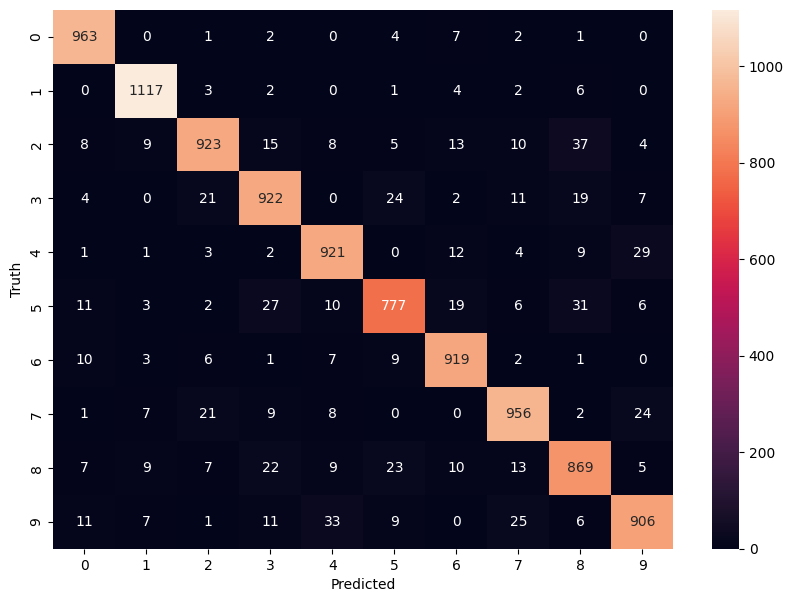

In [43]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Using hidden layer**
improve the performance

In [44]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')#It knows to figure out the input_shape from the previous layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2721 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1215 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0846 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0649 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0506 - accuracy: 0.9841


In [45]:

model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0769 - accuracy: 0.9771


[0.07692945748567581, 0.9771000146865845]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

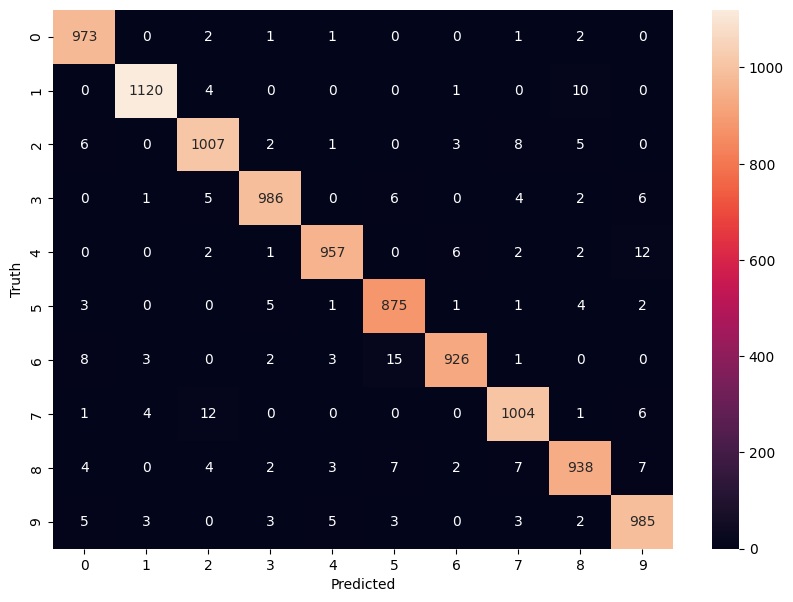

In [46]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Using Flatten layer so that we don't have to call .reshape on input dataset**

In [47]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2768 - accuracy: 0.9202
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1244 - accuracy: 0.9641
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0865 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0675 - accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0522 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0417 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0340 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0282 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0239 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

In [48]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0852 - accuracy: 0.9761


[0.08521576225757599, 0.9761000275611877]